In [1]:
!pip install -U ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 627.5/627.5 kB 20.1 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO
import locale
locale.getpreferredencoding = lambda: "UTF-8"
from google.colab.patches import cv2_imshow
import tensorflow as tf
#Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
tf.config.list_physical_devices('GPU')
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
model = YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:00<00:00, 56.7MB/s]


In [7]:
model.train(data=r"/content/drive/MyDrive/Machine Learning/Drone Search and Rescue YOLO/dataset/dataset.yaml", epochs=100, project=r"/content/drive/MyDrive/Machine Learning/Drone Search and Rescue YOLO/dataset" )

Ultralytics YOLOv8.0.132 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/Machine Learning/Drone Search and Rescue YOLO/dataset/dataset.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/Machine Learning/Drone Search and Rescue YOLO/dataset, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=Fals

In [8]:
metrics = model.val()

Ultralytics YOLOv8.0.132 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/Machine Learning/Drone Search and Rescue YOLO/dataset/labels/val.cache... 41 images, 0 backgrounds, 0 corrupt: 100%|██████████| 41/41 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.54s/it]
                   all         41         41      0.948      0.701      0.802      0.435
         capsized_boat         41         35      0.896      0.742      0.904      0.453
       drowning_person         41          6          1      0.661        0.7      0.416
Speed: 1.1ms preprocess, 25.8ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to /content/drive/MyDrive/Machine Learning/Drone Search and Rescue YOLO/dataset/val


In [9]:
model.export(format="onnx")
model.export(format="torchscript")

Ultralytics YOLOv8.0.132 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU

PyTorch: starting from /content/drive/MyDrive/Machine Learning/Drone Search and Rescue YOLO/dataset/train3/weights/best.pt with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (49.6 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 291.8 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 6.6s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.14.0 opset 17...


============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



ONNX: export success ✅ 11.0s, saved as /content/drive/MyDrive/Machine Learning/Drone Search and Rescue YOLO/dataset/train3/weights/best.onnx (98.8 MB)

Export complete (13.8s)
Results saved to /content/drive/MyDrive/Machine Learning/Drone Search and Rescue YOLO/dataset/train3/weights
Predict:         yolo predict task=detect model=/content/drive/MyDrive/Machine Learning/Drone Search and Rescue YOLO/dataset/train3/weights/best.onnx imgsz=640 
Validate:        yolo val task=detect model=/content/drive/MyDrive/Machine Learning/Drone Search and Rescue YOLO/dataset/train3/weights/best.onnx imgsz=640 data=/content/drive/MyDrive/Machine Learning/Drone Search and Rescue YOLO/dataset/dataset.yaml 
Visualize:       https://netron.app
Ultralytics YOLOv8.0.132 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU

PyTorch: starting from /content/drive/MyDrive/Machine Learning/Drone Search and Rescue YOLO/dataset/train3/weights/best.pt with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (49.6 

'/content/drive/MyDrive/Machine Learning/Drone Search and Rescue YOLO/dataset/train3/weights/best.torchscript'


100%|██████████| 47.8k/47.8k [00:00<00:00, 150kB/s]
image 1/1 /content/man-drowning-726x313.jpg: 288x640 3 drowning_persons, 87.2ms
Speed: 2.1ms preprocess, 87.2ms inference, 1.9ms postprocess per image at shape (1, 3, 288, 640)


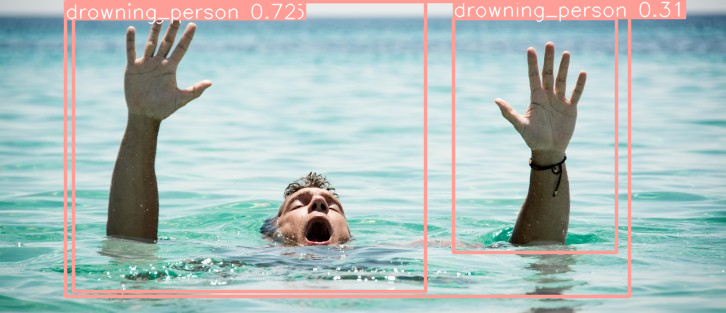

In [10]:
result = model('https://www.safeandsound.uk.net/wp-content/uploads/2016/08/man-drowning-726x313.jpg')

res_plotted = result[0].plot()
cv2_imshow(res_plotted)

In [ ]:

# Open the video file
video_path = "/content/drive/MyDrive/Machine Learning/Trap Camera Animal Detection/A Pair of Sun Bears (Helarctos malayanus) in Sumatra.mp4"
cap = cv2.VideoCapture(video_path)

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        # Run YOLOv8 inference on the frame
        results = model(frame)

        # Visualize the results on the frame
        annotated_frame = results[0].plot()

        # Display the annotated frame
        cv2_imshow(annotated_frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()

In [ ]:
# !yolo train data="/content/drive/MyDrive/Machine Learning/Trap Camera Animal Detection YOLO/dataset_1/dataset.yaml" model="yolov8n.pt" epochs=1 cfg="/content/drive/MyDrive/Machine Learning/Trap Camera Animal Detection YOLO/dataset_1/default.yaml"

Overriding /usr/local/lib/python3.10/dist-packages/ultralytics/yolo/cfg/default.yaml with /content/drive/MyDrive/Machine Learning/Trap Camera Animal Detection YOLO/dataset_1/default.yaml
WARNING ⚠️ 'model' is missing. Using default 'model=yolov8n.pt'.
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/cfg/__init__.py", line 411, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/engine/model.py", line 364, in train
    raise AttributeError("Dataset required but missing, i.e. pass 'data=coco128.yaml'")
AttributeError: Dataset required but missing, i.e. pass 'data=coco128.yaml'
